### Instrucciones generales <a class="tocSkip"></a>
1. Forme un grupo de **máximo dos estudiantes**
1. Copie este notebook y **modifique el nombre de archivo** agregando los apellidos de ambos miembros. Por ejemplo si los miembros del grupo son Pablo Huijse y Ana Nuñez el nombre sería: `info147_tarea1_huijse_nuñez.ipynb`
1. Versione su trabajo usando un **repositorio privado de github**. Agregue a su compañero y a su profesor (usuario github: phuijse) en la pestaña Puede agregar a su compañero en la pestaña *Settings/Manage access*
1. Sean leales y honestos, no copie los resultados de otros grupos, el único afectado es usted
1. Entregue el notebook con sus respuestas antes del plazo final al correo: phuijse@inf.uach.cl

# Tarea 1: Explorando datos mundiales de COVID-19 <a class="tocSkip"></a>

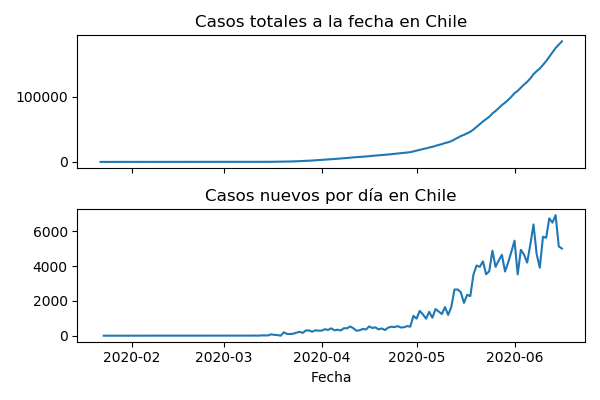


En esta actividad exploraremos la [base de datos de COVID-19 mantenida por la universidad John Hopkins](https://github.com/CSSEGISandData/COVID-19)

Utilice la versión con datos al 16 de Junio que se encuentra adjunto a este notebook en el archivo `data.zip`

Luego de descomprimir deberían observar cuatro archivos

Cada fila de estos archivos corresponde a un país y una región en particular con su latitud, longitud y una serie de tiempo de:

- `covid19_confirmados.csv` : Número de casos totales reportados como COVID-19 positivos
- `covid19_recuperados.csv` : Número de casos totales reportados como recuperados (podría ser considerablemente al valor real)
- `covid19_muertes.csv` : Número de decesos totales por COVID-19

El cuarto archivo `población_mundial.csv` contiene la población por país al 2020 más otros indicadores



> En cada sección de este cuadernillo encontrará instrucciones y preguntas

> Lea cuidadosamente los enunciados y complete con sus respuestas y resultados

> Escriba las rutinas de Python necesarias para resolver los problemas de cada punto. Use las librerías vistas en el curso, se evaluará el resultado pero también la eficiencia de su solución

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

display("Versión de pandas "+pd.__version__)

'Versión de pandas 1.0.3'

## Preparación de datos (1.5pt)

### Análisis preliminar

Considere el archivo `covid19_confirmados.csv` y conteste

- Use `head` para mostrar las tres primeras filas
- Use `cat` y `wc` para contar el número de filas del archivo
- Responda ¿A que corresponden las filas y columnas?  
- Responda ¿Qué tipo es más adecuado para cada columna?

In [2]:
#!type covid19_confirmados.csv

#!more covid19_confirmados.csv #windows

#linux?
# !head -3 covid19_confirmados.csv
# wc -l covid19_confirmados.csv

#filas: cada fila contiene la latlong de un pais, y el numero de casos covid 
# acumulados en cada fecha



### Cree un primer DataFrame a partir de `covid19_confirmados.csv` 

1. Utilize el nombre de pais como índice principal
1. Elimine las columnas `Lat` y `Long`
1. Use TimeStamps para los "nombres de columna" asociados a fechas
1. Reduzca la columna `Province/State`, el DataFrame resultante debe tener los totales a nivel país

### Cree un segundo DataFrame a partir `poblacion_mundial.csv`

1. Utilice el nombre de pais como índice principal
1. Elimina todas las columnas excepto `Population`

### Haga un `merge` de ambos DataFrames
1. Asigne un valor de `Population` a los elementos de primer DataFrame
1. Descarte las filas que no recibieron un valor de población

In [3]:
dfcc=pd.read_csv("covid19_confirmados.csv",index_col="Country/Region")
dfcc=dfcc.rename_axis('Country')

In [4]:
#elimina comuna 'lat' y long
dfcc=dfcc.drop(['Lat', 'Long'], axis=1)


In [5]:
#Use TimeStamps para los "nombres de columna" asociados a fechas
prov = dfcc['Province/State']
dfcc = dfcc.drop(['Province/State'], axis=1)
dfcc.columns = pd.to_datetime(dfcc.columns)
dfcc.insert(loc = 0, column = 'Province/State', value = prov)
display(dfcc)

,Province/State,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-06-07 00:00:00,2020-06-08 00:00:00,2020-06-09 00:00:00,2020-06-10 00:00:00,2020-06-11 00:00:00,2020-06-12 00:00:00,2020-06-13 00:00:00,2020-06-14 00:00:00,2020-06-15 00:00:00,2020-06-16 00:00:00
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0,0,0,0,0,0,0,0,0,...,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310
Albania,NaN,0,0,0,0,0,0,0,0,0,...,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672
Algeria,NaN,0,0,0,0,0,0,0,0,0,...,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147
Andorra,NaN,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,853,853,853,853,854
Angola,NaN,0,0,0,0,0,0,0,0,0,...,91,92,96,113,118,130,138,140,142,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sao Tome and Principe,NaN,0,0,0,0,0,0,0,0,0,...,513,513,514,611,632,639,659,661,662,671
Yemen,NaN,0,0,0,0,0,0,0,0,0,...,484,496,524,560,591,632,705,728,844,885
Comoros,NaN,0,0,0,0,0,0,0,0,0,...,141,141,141,162,162,163,176,176,176,197


In [6]:
#Reduzca la columna Province/State, el DataFrame resultante debe tener los totales a nivel país

dfcc=dfcc.groupby(["Country"]).sum()
##australia por ejemplo se aprecia que esta correcto
dfcc.head(10)

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310
Albania,0,0,0,0,0,0,0,0,0,0,...,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672
Algeria,0,0,0,0,0,0,0,0,0,0,...,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147
Andorra,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,853,853,853,853,854
Angola,0,0,0,0,0,0,0,0,0,0,...,91,92,96,113,118,130,138,140,142,148
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,26,26,26,26,26,26,26,26,26,26
Argentina,0,0,0,0,0,0,0,0,0,0,...,22794,23620,24761,25987,27373,28764,30295,31577,32785,34159
Armenia,0,0,0,0,0,0,0,0,0,0,...,13130,13325,13675,14103,14669,15281,16004,16667,17064,17489
Australia,0,0,0,0,4,5,5,6,9,9,...,7265,7267,7274,7285,7289,7294,7320,7335,7347,7370


### DataFrame a partir `poblacion_mundial.csv`

1. nombre de pais como índice principal
1. Elimina todas las columnas excepto `Population`

In [7]:
dfpm=pd.read_csv("población_mundial.csv",index_col="Country")
lista=(dfpm.columns)
dfpm=dfpm.drop(lista[1:], axis=1)
dfpm

,Population
Country,
China,1438207241
India,1377233523
US,330610570
Indonesia,272931713
Pakistan,219992900
...,...
Montserrat,4991
Falkland Islands,3458
Niue,1624


In [8]:
##Haga un merge de ambos DataFrames
dfcc=dfcc.reset_index()
dfpm=dfpm.reset_index()
#finalConfirmados dataFrame covid confirmados con poblacion mundial
finalConfirmados=pd.merge(dfcc,dfpm)
finalConfirmados=finalConfirmados.set_index("Country")

In [9]:
finalConfirmados

,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,2020-06-08 00:00:00,2020-06-09 00:00:00,2020-06-10 00:00:00,2020-06-11 00:00:00,2020-06-12 00:00:00,2020-06-13 00:00:00,2020-06-14 00:00:00,2020-06-15 00:00:00,2020-06-16 00:00:00,Population
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,20917,21459,22142,22890,23546,24102,24766,25527,26310,38742911
Albania,0,0,0,0,0,0,0,0,0,0,...,1263,1299,1341,1385,1416,1464,1521,1590,1672,2878420
Algeria,0,0,0,0,0,0,0,0,0,0,...,10265,10382,10484,10589,10698,10810,10919,11031,11147,43685618
Andorra,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,853,853,853,853,854,77240
Angola,0,0,0,0,0,0,0,0,0,0,...,92,96,113,118,130,138,140,142,148,32644783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,332,332,332,332,333,334,334,334,334,97160127
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,594215
Yemen,0,0,0,0,0,0,0,0,0,0,...,496,524,560,591,632,705,728,844,885,29687214


Repita el procedimiento anterior para los archivos covid19_recuperados.csv y covid19_muertes.csv

In [10]:
dfcm=pd.read_csv("covid19_muertes.csv", index_col="Country/Region")
dfcm=dfcm.rename_axis('Country')




In [11]:
#elimina comuna 'lat' y long
dfcm=dfcm.drop(['Lat', 'Long'], axis=1)

In [12]:
#Use TimeStamps para los "nombres de columna" asociados a fechas
prov = dfcm['Province/State']
dfcm = dfcm.drop(['Province/State'], axis=1)
dfcm.columns = pd.to_datetime(dfcm.columns)
dfcm.insert(loc = 0, column = 'Province/State', value = prov)

In [13]:
#Reduzca la columna Province/State, el DataFrame resultante debe tener los totales a nivel país
dfcm=dfcm.groupby(["Country"]).sum()

In [14]:
##Haga un merge de ambos DataFrames
dfcm=dfcm.reset_index()
finalMuertes=pd.merge(dfcm,dfpm)
finalMuertes=finalMuertes.set_index("Country")

In [15]:
finalMuertes

,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,2020-06-08 00:00:00,2020-06-09 00:00:00,2020-06-10 00:00:00,2020-06-11 00:00:00,2020-06-12 00:00:00,2020-06-13 00:00:00,2020-06-14 00:00:00,2020-06-15 00:00:00,2020-06-16 00:00:00,Population
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,369,384,405,426,446,451,471,478,491,38742911
Albania,0,0,0,0,0,0,0,0,0,0,...,34,34,34,35,36,36,36,36,37,2878420
Algeria,0,0,0,0,0,0,0,0,0,0,...,715,724,732,741,751,760,767,777,788,43685618
Andorra,0,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,52,77240
Angola,0,0,0,0,0,0,0,0,0,0,...,4,4,4,5,5,6,6,6,6,32644783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,97160127
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,594215
Yemen,0,0,0,0,0,0,0,0,0,0,...,112,127,129,136,139,160,164,208,214,29687214


In [16]:
dfcr=pd.read_csv("covid19_recuperados.csv",index_col="Country/Region")

dfcr=dfcr.rename_axis('Country')



In [17]:
#elimina la columna lat y long
dfcr=dfcr.drop(['Lat', 'Long'], axis=1)

In [18]:
#Use TimeStamps para los "nombres de columna" asociados a fechas
prov = dfcr['Province/State']
dfcr = dfcr.drop(['Province/State'], axis=1)
dfcr.columns = pd.to_datetime(dfcr.columns)
dfcr.insert(loc = 0, column = 'Province/State', value = prov)
#display(dfcr)

In [19]:
#Reduzca la columna Province/State, el DataFrame resultante debe tener los totales a nivel país
dfcr=dfcr.groupby(["Country"]).sum()

In [20]:
##Haga un merge de ambos DataFrames
dfcr=dfcr.reset_index()
finalRecuperados=pd.merge(dfcr,dfpm)
finalRecuperados=finalRecuperados.set_index("Country")

In [21]:
finalRecuperados

,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,2020-06-08 00:00:00,2020-06-09 00:00:00,2020-06-10 00:00:00,2020-06-11 00:00:00,2020-06-12 00:00:00,2020-06-13 00:00:00,2020-06-14 00:00:00,2020-06-15 00:00:00,2020-06-16 00:00:00,Population
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,2171,2651,3013,3326,3928,4201,4725,5164,5508,38742911
Albania,0,0,0,0,0,0,0,0,0,0,...,945,960,980,1001,1034,1039,1044,1055,1064,2878420
Algeria,0,0,0,0,0,0,0,0,0,0,...,6799,6951,7074,7255,7322,7420,7606,7735,7842,43685618
Andorra,0,0,0,0,0,0,0,0,0,0,...,751,757,759,780,781,781,781,789,789,77240
Angola,0,0,0,0,0,0,0,0,0,0,...,38,38,40,41,42,61,61,64,64,32644783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,0,0,0,0,0,0,0,0,0,...,316,316,320,321,323,323,323,323,325,97160127
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,8,8,8,8,594215
Yemen,0,0,0,0,0,0,0,0,0,0,...,23,23,23,23,28,39,53,79,91,29687214


## Análisis global (2pt)

Calcule la cantidad total mundial a la fecha (16 de Junio) de los casos 
- confirmados
- cerrados: recuperados + decesos
- activos: confirmados - cerrados

In [37]:
confirmados=finalConfirmados.iloc[:,-2].sum()
decesos=finalMuertes.iloc[:,-2].sum()
recuperados=finalRecuperados.iloc[:,-2].sum()
cerrados=recuperados+decesos
activos=confirmados-cerrados

In [38]:
#no me acuerdo otra aparte del format :C 
display("casos confirmados hasta el 16 de junio: {0}".format(confirmados))
display("casos cerrados hasta el 16 de junio: {0}".format(cerrados))
display("casos activos hasta el 16 de junio: {0}".format(activos))

'casos confirmados hasta el 16 de junio: 8154452'

'casos cerrados hasta el 16 de junio: 4385993'

'casos activos hasta el 16 de junio: 3768459'

En base a estas cantidades calcule el porcentaje de 
- casos activos con respecto al total de confirmados
- decesos con respecto al total de casos cerrados
- recuperados con respecto al total de casos cerrados


Muestre gráficas a nivel mundial de
- la cantidad de **casos confirmados nuevos** por día
- la cantidad de **recuperados nuevos** por día
- la cantidad de **decesos nuevos** por día

In [23]:
def casosPorDia(df):
    casos=[]
    for i in range (1,df.shape[1]-1):
        casos.append(df.iloc[:,i].sum()-df.iloc[:,i-1].sum())
    
    return np.array(casos)
    

<IPython.core.display.Javascript object>


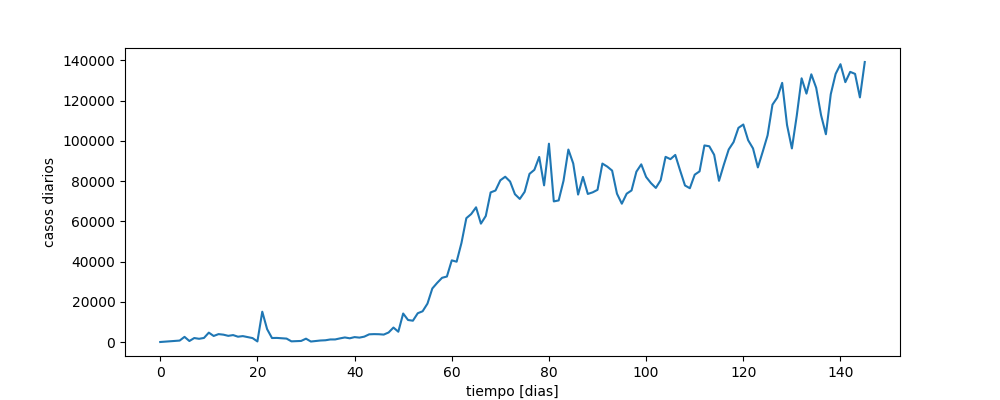

In [24]:
casosDiarios=casosPorDia(finalConfirmados)
fig, ax =plt.subplots(figsize=(10,4), facecolor='w')
ax.set_xlabel('tiempo [dias]')
ax.set_ylabel('casos diarios')
ax.plot(casosDiarios);

<IPython.core.display.Javascript object>


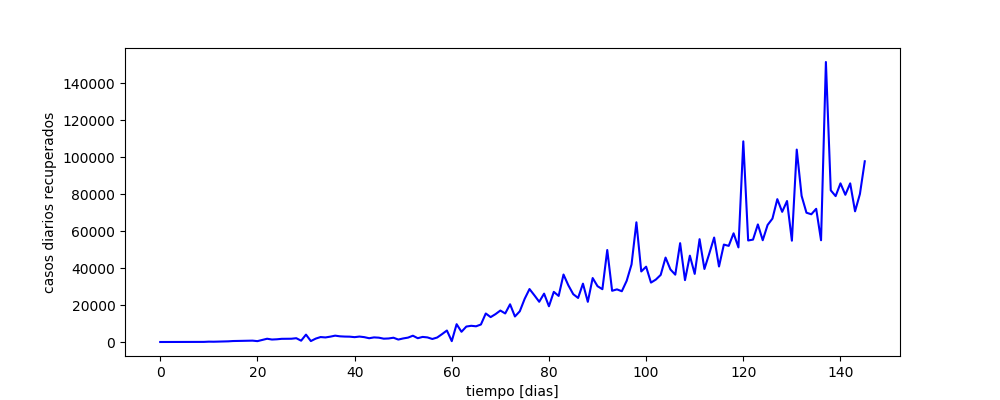

In [25]:
recuperadosDiarios=casosPorDia(finalRecuperados)
fig2, ax2 =plt.subplots(figsize=(10,4), facecolor='w')
ax2.set_xlabel('tiempo [dias]')
ax2.set_ylabel('casos diarios recuperados')
ax2.plot(recuperadosDiarios, c='blue');

<IPython.core.display.Javascript object>


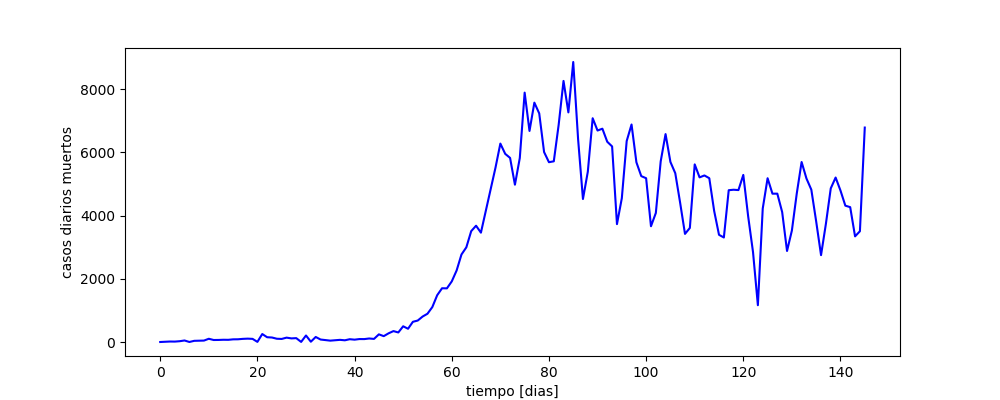

In [26]:
muertosDiarios=casosPorDia(finalMuertes)
fig3, ax3 =plt.subplots(figsize=(10,4), facecolor='w')
ax3.set_xlabel('tiempo [dias]')
ax3.set_ylabel('casos diarios muertos')
ax3.plot(muertosDiarios, c='blue');


Encuentre y muestre los nombres y los valores de los 5 paises que a la fecha tienen
- La mayor tasa de incidencia (confirmados por 100.000 dividido población)
- La menor tasa de incidencia 
- La mayor tasa de recuperación (recuperados por 100.000 dividido población)
- La menor tasa de recuperación 
- La mayor tasa de mortalidad (decesos por 100.000 divido población)
- La menor tasa de mortalidad 

¿En qué lugar se encuentra Chile con respecto a cada una de estas métricas? ¿A qué paises se parece más? Discuta y comente sobre sus hallazgos

In [27]:
def incidencia(df):
    return (df.iloc[:,-2]*100000/df.iloc[:,-1])
    
    
def mayoresMenores(df):
    display("os mayores paises son: ")
    display(df.sort_values(axis=0, ascending=False).head(5))
    display("os menores paises son: ")
    display(df.sort_values(axis=0,ascending=False).tail(5))

In [28]:
display("**incidencia confirmados**")
mayoresMenores(incidencia(finalConfirmados))

display("**incidencia muertes**")
mayoresMenores(incidencia(finalMuertes))

display("**incidencia recuperados**")
mayoresMenores(incidencia(finalRecuperados))


'**incidencia confirmados**'

'os mayores paises son: '

Country
Qatar         2858.907348
San Marino    2046.171536
Holy See      1498.127341
Bahrain       1157.921604
Andorra       1105.644744
dtype: float64

'os menores paises son: '

Country
Angola              0.453365
Vietnam             0.343762
Laos                0.261935
Lesotho             0.187021
Papua New Guinea    0.089771
dtype: float64

'**incidencia muertes**'

'os mayores paises son: '

Country
San Marino        123.831707
Belgium            83.449365
Andorra            67.322631
United Kingdom     62.013654
Spain              58.043461
dtype: float64

'os menores paises son: '

Country
Timor-Leste    0.0
Saint Lucia    0.0
Dominica       0.0
Cambodia       0.0
Seychelles     0.0
dtype: float64

'**incidencia recuperados**'

'os mayores paises son: '

Country
Qatar         2105.978498
San Marino    1739.540643
Holy See      1498.127341
Andorra       1021.491455
Bahrain        821.139516
dtype: float64

'os menores paises son: '

Country
Haiti               0.211008
Angola              0.196050
Lesotho             0.093510
Papua New Guinea    0.089771
Sweden              0.000000
dtype: float64

## Análisis comparativo (2.5pt)

Construya una interfaz gráfica usando `ipywidgets` y `matplotlib`

- La interfaz debe incluir dos controles para escoger dos paises entre los paises pertenecientes a la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos)
- La interfaz debe mostrar tres gráficos con la evolución temporal de casos confirmados, recuperados y decesos en ambos paises 
- La interfaz debe tener un control que permita escoger entre valores totales acumulados, valores totales diarios y tasas por 100.000 habitantes


En base a su interfaz estudie el caso de Chile contra dos paises de la OCDE seleccionados por usted y comente sobre lo que observa

## BONUS (Opcional)

Implemente una app web a partir de su interfaz desarrollada en el punto anterior en base a jupyter widgets usando [viola](https://github.com/voila-dashboards/voila) y [heroku](https://github.com/voila-dashboards/voila-heroku)

Escriba acá el link a su app web